# Ex2 - Getting and Knowing your Data

Check out [Chipotle Exercises Video Tutorial](https://www.youtube.com/watch?v=lpuYZ5EUyS8&list=PLgJhDSE2ZLxaY_DigHeiIDC1cD09rXgJv&index=2) to watch a data scientist go through the exercises

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [3]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')

### Step 4. See the first 10 entries

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [5]:
# Solution 1

chipo.shape[0]  # entries <= 4622 observations

4622

In [6]:
# Solution 2

chipo.info() # entries <= 4622 observations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### Step 6. What is the number of columns in the dataset?

In [7]:
chipo.shape[1]

5

### Step 7. Print the name of all the columns.

In [8]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [9]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item? 

In [10]:
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### Step 10. For the most-ordered item, how many items were ordered?

In [10]:
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### Step 11. What was the most ordered item in the choice_description column?

In [11]:
c = chipo.groupby('choice_description').sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)
# Diet Coke 159

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


### Step 12. How many items were orderd in total?

In [12]:
total_items_orders = chipo.quantity.sum()
total_items_orders

4972

### Step 13. Turn the item price into a float

#### Step 13.a. Check the item price type

In [13]:
chipo.item_price.dtype

dtype('O')

#### Step 13.b. Create a lambda function and change the type of item price

In [14]:
dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)

#### Step 13.c. Check the item price type

In [15]:
chipo.item_price.dtype

dtype('float64')

### Step 14. How much was the revenue for the period in the dataset?

In [22]:
revenue = (chipo['quantity']* chipo['item_price']).sum()

print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $39237.02


### Step 15. How many orders were made in the period?

In [23]:
orders = chipo.order_id.value_counts().count()
orders

1834

### Step 16. What is the average revenue amount per order?

In [31]:
# Solution 1

chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.394231188658654

In [32]:
# Solution 2

chipo.groupby(by=['order_id']).sum().mean()['revenue']

21.394231188658654

### Step 17. How many different items are sold?

In [33]:
chipo.item_name.value_counts().count()

50

# Ex3 - Getting and Knowing your Data

Check out [Occupation Exercises Video Tutorial](https://www.youtube.com/watch?v=W8AB5s-L3Rw&list=PLgJhDSE2ZLxaY_DigHeiIDC1cD09rXgJv&index=4) to watch a data scientist go through the exercises

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [39]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user). 

### Step 3. Assign it to a variable called users and use the 'user_id' as index

In [40]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')

### Step 4. See the first 25 entries

In [41]:
users.head(25)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


### Step 5. See the last 10 entries

In [42]:
users.tail(10)

,age,gender,occupation,zip_code
user_id,,,,
934,61,M,engineer,22902
935,42,M,doctor,66221
936,24,M,other,32789
937,48,M,educator,98072
938,38,F,technician,55038
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209


### Step 6. What is the number of observations in the dataset?

In [43]:
users.shape[0]

943

### Step 7. What is the number of columns in the dataset?

In [44]:
users.shape[1]

4

### Step 8. Print the name of all the columns.

In [45]:
users.columns

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')

### Step 9. How is the dataset indexed?

In [46]:
# "the index" (aka "the labels")
users.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)

### Step 10. What is the data type of each column?

In [47]:
users.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

### Step 11. Print only the occupation column

In [48]:
users.occupation

#or

users['occupation']

user_id
1         technician
2              other
3             writer
4         technician
5              other
6          executive
7      administrator
8      administrator
9            student
10            lawyer
11             other
12             other
13          educator
14         scientist
15          educator
16     entertainment
17        programmer
18             other
19         librarian
20         homemaker
21            writer
22            writer
23            artist
24            artist
25          engineer
26          engineer
27         librarian
28            writer
29        programmer
30           student
           ...      
914            other
915    entertainment
916         engineer
917          student
918        scientist
919            other
920           artist
921          student
922    administrator
923          student
924            other
925         salesman
926    entertainment
927       programmer
928          student
929        scientist
930  

### Step 12. How many different occupations are in this dataset?

In [49]:
users.occupation.nunique()
#or by using value_counts() which returns the count of unique elements
#users.occupation.value_counts().count()

21

### Step 13. What is the most frequent occupation?

In [50]:
#Because "most" is asked
users.occupation.value_counts().head(1).index[0]

#or
#to have the top 5

# users.occupation.value_counts().head()

'student'

### Step 14. Summarize the DataFrame.

In [51]:
users.describe() #Notice: by default, only the numeric columns are returned. 

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


### Step 15. Summarize all the columns

In [52]:
users.describe(include = "all") #Notice: By default, only the numeric columns are returned.

,age,gender,occupation,zip_code
count,943.000000,943,943,943
unique,NaN,2,21,795
top,NaN,M,student,55414
freq,NaN,670,196,9
mean,34.051962,NaN,NaN,NaN
std,12.192740,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN


### Step 16. Summarize only the occupation column

In [53]:
users.occupation.describe()

count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object

### Step 17. What is the mean age of users?

In [54]:
round(users.age.mean())

34

### Step 18. What is the age with least occurrence?

In [57]:
users.age.value_counts().tail() #7, 10, 11, 66 and 73 years -> only 1 occurrence

11    1
10    1
73    1
66    1
7     1
Name: age, dtype: int64

# Ex1 - Getting and knowing your Data
Check out [World Food Facts Exercises Video Tutorial](https://youtu.be/_jCSK4cMcVw) to watch a data scientist go through the exercises

### Step 1. Go to https://www.kaggle.com/openfoodfacts/world-food-facts/data

###  Step 2. Download the dataset to your computer and unzip it.

In [2]:
import pandas as pd
import numpy as np

### Step 3. Use the tsv file and assign it to a dataframe called food

In [3]:
food = pd.read_csv('~/Desktop/en.openfoodfacts.org.products.tsv', sep='\t')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Step 4. See the first 5 entries

In [4]:
food.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 5. What is the number of observations in the dataset?

In [5]:
food.shape #will give you both (observations/rows, columns)

(356027, 163)

In [6]:
food.shape[0] #will give you only the observations/rows number

356027

### Step 6. What is the number of columns in the dataset?

In [7]:
print(food.shape) #will give you both (observations/rows, columns)
print(food.shape[1]) #will give you only the columns number

#OR

food.info() #Columns: 163 entries

(356027, 163)
163
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


### Step 7. Print the name of all the columns.

In [8]:
food.columns

Index([u'code', u'url', u'creator', u'created_t', u'created_datetime',
       u'last_modified_t', u'last_modified_datetime', u'product_name',
       u'generic_name', u'quantity',
       ...
       u'fruits-vegetables-nuts_100g', u'fruits-vegetables-nuts-estimate_100g',
       u'collagen-meat-protein-ratio_100g', u'cocoa_100g', u'chlorophyl_100g',
       u'carbon-footprint_100g', u'nutrition-score-fr_100g',
       u'nutrition-score-uk_100g', u'glycemic-index_100g',
       u'water-hardness_100g'],
      dtype='object', length=163)

### Step 8. What is the name of 105th column?

In [9]:
food.columns[104]

'-glucose_100g'

### Step 9. What is the type of the observations of the 105th column?

In [10]:
food.dtypes['-glucose_100g']

dtype('float64')

### Step 10. How is the dataset indexed?

In [11]:
food.index

RangeIndex(start=0, stop=356027, step=1)

### Step 11. What is the product name of the 19th observation?

In [13]:
food.values[18][7]

'Lotus Organic Brown Jasmine Rice'

# Ex1 - Filtering and Sorting Data

Check out [Chipotle Exercises Video Tutorial](https://youtu.be/ZZPiWZpdekA) to watch a data scientist go through the exercises

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [2]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [28]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipo = pd.read_csv(url, sep = '\t')

### Step 4. How many products cost more than $10.00?

In [21]:
# clean the item_price column and transform it in a float
prices = [float(value[1 : -1]) for value in chipo.item_price]

# reassign the column with the cleaned prices
chipo.item_price = prices

# delete the duplicates in item_name and quantity
chipo_filtered = chipo.drop_duplicates(['item_name','quantity','choice_description'])

# chipo_filtered

# select only the products with quantity equals to 1
chipo_one_prod = chipo_filtered[chipo_filtered.quantity == 1]
chipo_one_prod

# chipo_one_prod[chipo_one_prod['item_price']>10].item_name.nunique()
# chipo_one_prod[chipo_one_prod['item_price']>10]



chipo.query('price_per_item > 10').item_name.nunique()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",10.98
39,19,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.75
42,20,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25
43,20,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Chees...",11.75
45,21,1,Chicken Burrito,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",10.98
52,24,1,Chicken Burrito,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",10.98


### Step 5. What is the price of each item? 
###### print a data frame with only two columns item_name and item_price

In [25]:
# delete the duplicates in item_name and quantity
# chipo_filtered = chipo.drop_duplicates(['item_name','quantity'])
chipo[(chipo['item_name'] == 'Chicken Bowl') & (chipo['quantity'] == 1)]

# select only the products with quantity equals to 1
# chipo_one_prod = chipo_filtered[chipo_filtered.quantity == 1]

# select only the item_name and item_price columns
# price_per_item = chipo_one_prod[['item_name', 'item_price']]

# sort the values from the most to less expensive
# price_per_item.sort_values(by = "item_price", ascending = False).head(20)

,order_id,quantity,item_name,choice_description,item_price
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49
42,20,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25
76,34,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",8.75
78,34,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
99,44,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Fajita Vege...",8.75
110,49,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75
123,54,1,Chicken Bowl,"[Fresh Tomato Salsa, [Guacamole, Cheese, Sour ...",11.25


### Step 6. Sort by the name of the item

In [25]:
chipo.item_name.sort_values()

# OR

chipo.sort_values(by = "item_name")

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49
3422,1373,1,6 Pack Soft Drink,[Coke],6.49
553,230,1,6 Pack Soft Drink,[Diet Coke],6.49
1916,774,1,6 Pack Soft Drink,[Diet Coke],6.49
1922,776,1,6 Pack Soft Drink,[Coke],6.49
1937,784,1,6 Pack Soft Drink,[Diet Coke],6.49


### Step 7. What was the quantity of the most expensive item ordered?

In [26]:
chipo.sort_values(by = "item_price", ascending = False).head(1)

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25


### Step 8. How many times was a Veggie Salad Bowl ordered?

In [18]:
chipo_salad = chipo[chipo.item_name == "Veggie Salad Bowl"]

len(chipo_salad)

18

### Step 9. How many times did someone order more than one Canned Soda?

In [28]:
chipo_drink_steak_bowl = chipo[(chipo.item_name == "Canned Soda") & (chipo.quantity > 1)]
len(chipo_drink_steak_bowl)

20

# Ex2 - Filtering and Sorting Data
Check out [Euro 12 Exercises Video Tutorial](https://youtu.be/iqk5d48Qisg) to watch a data scientist go through the exercises

This time we are going to pull data directly from the internet.

### Step 1. Import the necessary libraries

In [2]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv). 

### Step 3. Assign it to a variable called euro12.

In [3]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', sep=',')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


### Step 4. Select only the Goal column.

In [37]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

### Step 5. How many team participated in the Euro2012?

In [43]:
euro12.shape[0]

16

### Step 6. What is the number of columns in the dataset?

In [44]:
euro12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
Team                          16 non-null object
Goals                         16 non-null int64
Shots on target               16 non-null int64
Shots off target              16 non-null int64
Shooting Accuracy             16 non-null object
% Goals-to-shots              16 non-null object
Total shots (inc. Blocked)    16 non-null int64
Hit Woodwork                  16 non-null int64
Penalty goals                 16 non-null int64
Penalties not scored          16 non-null int64
Headed goals                  16 non-null int64
Passes                        16 non-null int64
Passes completed              16 non-null int64
Passing Accuracy              16 non-null object
Touches                       16 non-null int64
Crosses                       16 non-null int64
Dribbles                      16 non-null int64
Corners Taken                 16 non-null int64
Tackles                      

### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [82]:
# filter only giving the column names

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


### Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [56]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


### Step 9. Calculate the mean Yellow Cards given per Team

In [55]:
round(discipline['Yellow Cards'].mean())

7.0

### Step 10. Filter teams that scored more than 6 goals

In [57]:
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


### Step 11. Select the teams that start with G

In [66]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


### Step 12. Select the first 7 columns

In [84]:
# use .iloc to slices via the position of the passed integers
# : means all, 0:7 means from 0 to 7

euro12.iloc[: , 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


### Step 13. Select all columns except the last 3.

In [86]:
# use negative to exclude the last 3 columns

euro12.iloc[: , :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [89]:
# .loc is another way to slice, using the labels of the columns and indexes

euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Fictional Army - Filtering and Sorting
Check out [Fictional Army Exercises Video Tutorial](https://youtu.be/42LGuRea7DE) to watch a data scientist go through the exercises

### Introduction:

This exercise was inspired by this [page](http://chrisalbon.com/python/)

Special thanks to: https://github.com/chrisalbon for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. This is the data given as a dictionary

In [2]:
# Create an example dataframe about a fictional army
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35],
            'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'readiness': [1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}

### Step 3. Create a dataframe and assign it to a variable called army. 

#### Don't forget to include the columns names in the order presented in the dictionary ('regiment', 'company', 'deaths'...) so that the column index order is consistent with the solutions. If omitted, pandas will order the columns alphabetically.

In [3]:
army = pd.DataFrame(data=raw_data)
army

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters,origin
0,Nighthawks,1st,523,5,1045,1,1,1,4,Arizona
1,Nighthawks,1st,52,42,957,5,2,0,24,California
2,Nighthawks,2nd,25,2,1099,62,3,1,31,Texas
3,Nighthawks,2nd,616,2,1400,26,3,1,2,Florida
4,Dragoons,1st,43,4,1592,73,2,0,3,Maine
5,Dragoons,1st,234,7,1006,37,1,1,4,Iowa
6,Dragoons,2nd,523,8,987,949,2,0,24,Alaska
7,Dragoons,2nd,62,3,849,48,3,1,31,Washington
8,Scouts,1st,62,4,973,48,2,0,2,Oregon
9,Scouts,1st,73,7,1005,435,1,0,3,Wyoming


### Step 4. Set the 'origin' colum as the index of the dataframe

In [4]:
army.set_index('origin', inplace=True)

### Step 5. Print only the column veterans

In [5]:
army.veterans

origin
Arizona         1
California      5
Texas          62
Florida        26
Maine          73
Iowa           37
Alaska        949
Washington     48
Oregon         48
Wyoming       435
Louisana       63
Georgia       345
Name: veterans, dtype: int64

### Step 6. Print the columns 'veterans' and 'deaths'

In [6]:
army[["veterans", "deaths"]]

,veterans,deaths
origin,,
Arizona,1,523
California,5,52
Texas,62,25
Florida,26,616
Maine,73,43
Iowa,37,234
Alaska,949,523
Washington,48,62
Oregon,48,62


### Step 7. Print the name of all the columns.

In [7]:
army.columns

Index(['regiment', 'company', 'deaths', 'battles', 'size', 'veterans',
       'readiness', 'armored', 'deserters'],
      dtype='object')

### Step 8. Select the 'deaths', 'size' and 'deserters' columns from Maine and Alaska

In [8]:
army.loc[["Maine", "Alaska"], ["deaths", "size", "deserters"]]

,deaths,size,deserters
origin,,,
Maine,43,1592,3
Alaska,523,987,24


### Step 9. Select the rows 3 to 7 and the columns 3 to 6

In [9]:
army.iloc[2:7, 2:6]

,deaths,battles,size,veterans
origin,,,,
Texas,25,2,1099,62
Florida,616,2,1400,26
Maine,43,4,1592,73
Iowa,234,7,1006,37
Alaska,523,8,987,949


### Step 10. Select every row after the fourth row and all columns

In [10]:
army.iloc[4:, :]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


### Step 11. Select every row up to the 4th row and all columns

In [11]:
army.iloc[:4, :]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2


### Step 12. Select the 3rd column up to the 7th column

In [12]:
army.iloc[:, 2:7]

,deaths,battles,size,veterans,readiness
origin,,,,,
Arizona,523,5,1045,1,1
California,52,42,957,5,2
Texas,25,2,1099,62,3
Florida,616,2,1400,26,3
Maine,43,4,1592,73,2
Iowa,234,7,1006,37,1
Alaska,523,8,987,949,2
Washington,62,3,849,48,3
Oregon,62,4,973,48,2


### Step 13. Select rows where df.deaths is greater than 50

In [13]:
army[army["deaths"] > 50]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3


### Step 14. Select rows where df.deaths is greater than 500 or less than 50

In [14]:
army[(army["deaths"] > 500) | (army["deaths"] < 50)]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


### Step 15. Select all the regiments not named "Dragoons"

In [15]:
army[army["regiment"] != "Dragoons"]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


### Step 16. Select the rows called Texas and Arizona

In [16]:
army.loc[["Texas", "Arizona"], :]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4


### Step 17. Select the third cell in the row named Arizona

In [17]:
army.loc[["Arizona"]].iloc[:, 2]

origin
Arizona    523
Name: deaths, dtype: int64

### Step 18. Select the third cell down in the column named deaths

In [18]:
army.loc[:, ["deaths"]].iloc[2]

deaths    25
Name: Texas, dtype: int64

# Ex - GroupBy

Check out [Alcohol Consumption Exercises Video Tutorial](https://youtu.be/az67CMdmS6s) to watch a data scientist go through the exercises

### Introduction:

GroupBy can be summarized as Split-Apply-Combine.

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

Check out this [Diagram](http://i.imgur.com/yjNkiwL.png)  
### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

### Step 3. Assign it to a variable called drinks.

In [4]:
drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### Step 4. Which continent drinks more beer on average?

In [6]:
drinks.groupby('continent').beer_servings.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

### Step 5. For each continent print the statistics for wine consumption.

In [9]:
drinks.groupby('continent').wine_servings.describe()

continent       
AF         count     53.000000
           mean      16.264151
           std       38.846419
           min        0.000000
           25%        1.000000
           50%        2.000000
           75%       13.000000
           max      233.000000
AS         count     44.000000
           mean       9.068182
           std       21.667034
           min        0.000000
           25%        0.000000
           50%        1.000000
           75%        8.000000
           max      123.000000
EU         count     45.000000
           mean     142.222222
           std       97.421738
           min        0.000000
           25%       59.000000
           50%      128.000000
           75%      195.000000
           max      370.000000
OC         count     16.000000
           mean      35.625000
           std       64.555790
           min        0.000000
           25%        1.000000
           50%        8.500000
           75%       23.250000
           max      21

### Step 6. Print the mean alcohol consumption per continent for every column

In [10]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 7. Print the median alcohol consumption per continent for every column

In [14]:
drinks.groupby('continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [15]:
drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max'])

,mean,min,max
continent,,,
AF,16.339623,0,152
AS,60.840909,0,326
EU,132.555556,0,373
OC,58.437500,0,254
SA,114.750000,25,302


# Occupation

Check out [Occupation Exercises Video Tutorial](https://youtu.be/jL3EVCoYIJQ) to watch a data scientist go through the exercises

### Introduction:

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [64]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user). 

### Step 3. Assign it to a variable called users.

In [65]:
users = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


### Step 4. Discover what is the mean age per occupation

In [66]:
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

### Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [150]:
# create a function
def gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0

# apply the function to the gender column and create a new column
users['gender_n'] = users['gender'].apply(gender_to_numeric)


a = users.groupby('occupation').gender_n.sum() / users.occupation.value_counts() * 100 

# sort to the most male 
a.sort_values(ascending = False)

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

### Step 6. For each occupation, calculate the minimum and maximum ages

In [151]:
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


### Step 7. For each combination of occupation and gender, calculate the mean age

In [152]:
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

### Step 8.  For each occupation present the percentage of women and men

In [154]:
# create a data frame and apply count to gender
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

# create a DataFrame and apply count for each occupation
occup_count = users.groupby(['occupation']).agg('count')

# divide the gender_ocup per the occup_count and multiply per 100
occup_gender = gender_ocup.div(occup_count, level = "occupation") * 100

# present all rows from the 'gender column'
occup_gender.loc[: , 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Regiment

Check out [Regiment Exercises Video Tutorial](https://youtu.be/MFZ3uakwAEk) to watch a data scientist go through the exercises

### Introduction:

Special thanks to: http://chrisalbon.com/ for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Create the DataFrame with the following values:

In [4]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

### Step 3. Assign it to a variable called regiment.
#### Don't forget to name each column

In [6]:
regiment = pd.DataFrame(raw_data, columns = raw_data.keys())
regiment

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


### Step 4. What is the mean preTestScore from the regiment Nighthawks?  

In [26]:
regiment[regiment['regiment'] == 'Nighthawks'].groupby('regiment').mean()

,preTestScore,postTestScore
regiment,,
Dragoons,15.50,61.5
Nighthawks,15.25,59.5
Scouts,2.50,66.0


### Step 5. Present general statistics by company

In [29]:
regiment.groupby('company').describe()

postTestScore  preTestScore
company                                   
1st     count       6.000000      6.000000
        mean       57.666667      6.666667
        std        27.485754      8.524475
        min        25.000000      2.000000
        25%        34.250000      3.000000
        50%        66.000000      3.500000
        75%        70.000000      4.000000
        max        94.000000     24.000000
2nd     count       6.000000      6.000000
        mean       67.000000     15.500000
        std        14.057027     14.652645
        min        57.000000      2.000000
        25%        58.250000      2.250000
        50%        62.000000     13.500000
        75%        68.000000     29.250000
        max        94.000000     31.000000

### Step 6. What is the mean of each company's preTestScore?

In [33]:
regiment.groupby('company').preTestScore.mean()

company
1st     6.666667
2nd    15.500000
Name: preTestScore, dtype: float64

### Step 7. Present the mean preTestScores grouped by regiment and company

In [35]:
regiment.groupby(['regiment', 'company']).preTestScore.mean()

regiment    company
Dragoons    1st         3.5
            2nd        27.5
Nighthawks  1st        14.0
            2nd        16.5
Scouts      1st         2.5
            2nd         2.5
Name: preTestScore, dtype: float64

### Step 8. Present the mean preTestScores grouped by regiment and company without heirarchical indexing

In [36]:
regiment.groupby(['regiment', 'company']).preTestScore.mean().unstack()

company,1st,2nd
regiment,,
Dragoons,3.5,27.5
Nighthawks,14.0,16.5
Scouts,2.5,2.5


### Step 9. Group the entire dataframe by regiment and company

In [37]:
regiment.groupby(['regiment', 'company']).mean()

preTestScore  postTestScore
regiment   company                             
Dragoons   1st               3.5           47.5
           2nd              27.5           75.5
Nighthawks 1st              14.0           59.5
           2nd              16.5           59.5
Scouts     1st               2.5           66.0
           2nd               2.5           66.0

### Step 10. What is the number of observations in each regiment and company

In [41]:
regiment.groupby(['company', 'regiment']).size()

company  regiment  
1st      Dragoons      2
         Nighthawks    2
         Scouts        2
2nd      Dragoons      2
         Nighthawks    2
         Scouts        2
dtype: int64

### Step 11. Iterate over a group and print the name and the whole data from the regiment

In [50]:
# Group the dataframe by regiment, and for each regiment,
for name, group in regiment.groupby('regiment'):
    # print the name of the regiment
    print(name)
    # print the data of that regiment
    print(group)

Dragoons
   regiment company    name  preTestScore  postTestScore
4  Dragoons     1st   Cooze             3             70
5  Dragoons     1st   Jacon             4             25
6  Dragoons     2nd  Ryaner            24             94
7  Dragoons     2nd    Sone            31             57
Nighthawks
     regiment company      name  preTestScore  postTestScore
0  Nighthawks     1st    Miller             4             25
1  Nighthawks     1st  Jacobson            24             94
2  Nighthawks     2nd       Ali            31             57
3  Nighthawks     2nd    Milner             2             62
Scouts
   regiment company   name  preTestScore  postTestScore
8    Scouts     1st  Sloan             2             62
9    Scouts     1st  Piger             3             70
10   Scouts     2nd  Riani             2             62
11   Scouts     2nd    Ali             3             70


# Student Alcohol Consumption

### Introduction:

This time you will download a dataset from the UCI.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv).

### Step 3. Assign it to a variable called df.

In [2]:
csv_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv'
df = pd.read_csv(csv_url)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Step 4. For the purpose of this exercise slice the dataframe from 'school' until the 'guardian' column

In [3]:
stud_alcoh = df.loc[: , "school":"guardian"]
stud_alcoh.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother
4,GP,F,16,U,GT3,T,3,3,other,other,home,father


### Step 5. Create a lambda function that will capitalize strings.

In [1]:
capitalizer = lambda x: x.capitalize()

### Step 6. Capitalize both Mjob and Fjob

In [11]:
stud_alcoh['Mjob'].apply(capitalizer)
stud_alcoh['Fjob'].apply(capitalizer)

0       Teacher
1         Other
2         Other
3      Services
4         Other
5         Other
6         Other
7       Teacher
8         Other
9         Other
10       Health
11        Other
12     Services
13        Other
14        Other
15        Other
16     Services
17        Other
18     Services
19        Other
20        Other
21       Health
22        Other
23        Other
24       Health
25     Services
26        Other
27     Services
28        Other
29      Teacher
         ...   
365       Other
366    Services
367    Services
368    Services
369     Teacher
370    Services
371    Services
372     At_home
373       Other
374       Other
375       Other
376       Other
377    Services
378       Other
379       Other
380     Teacher
381       Other
382    Services
383    Services
384       Other
385       Other
386     At_home
387       Other
388    Services
389       Other
390    Services
391    Services
392       Other
393       Other
394     At_home
Name: Fjob, dtype: objec

### Step 7. Print the last elements of the data set.

In [12]:
stud_alcoh.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
390,MS,M,20,U,LE3,A,2,2,services,services,course,other
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother
392,MS,M,21,R,GT3,T,1,1,other,other,course,other
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father


### Step 8. Did you notice the original dataframe is still lowercase? Why is that? Fix it and capitalize Mjob and Fjob.

In [13]:
stud_alcoh['Mjob'] = stud_alcoh['Mjob'].apply(capitalizer)
stud_alcoh['Fjob'] = stud_alcoh['Fjob'].apply(capitalizer)
stud_alcoh.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
390,MS,M,20,U,LE3,A,2,2,Services,Services,course,other
391,MS,M,17,U,LE3,T,3,1,Services,Services,course,mother
392,MS,M,21,R,GT3,T,1,1,Other,Other,course,other
393,MS,M,18,R,LE3,T,3,2,Services,Other,course,mother
394,MS,M,19,U,LE3,T,1,1,Other,At_home,course,father


### Step 9. Create a function called majority that returns a boolean value to a new column called legal_drinker (Consider majority as older than 17 years old)

In [14]:
def majority(x):
    if x > 17:
        return True
    else:
        return False

In [15]:
stud_alcoh['legal_drinker'] = stud_alcoh['age'].apply(majority)
stud_alcoh.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,legal_drinker
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,course,mother,True
1,GP,F,17,U,GT3,T,1,1,At_home,Other,course,father,False
2,GP,F,15,U,LE3,T,1,1,At_home,Other,other,mother,False
3,GP,F,15,U,GT3,T,4,2,Health,Services,home,mother,False
4,GP,F,16,U,GT3,T,3,3,Other,Other,home,father,False


### Step 10. Multiply every number of the dataset by 10. 
##### I know this makes no sense, don't forget it is just an exercise

In [16]:
def times10(x):
    if type(x) is int:
        return 10 * x
    return x

In [17]:
stud_alcoh.applymap(times10).head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,legal_drinker
0,GP,F,180,U,GT3,A,40,40,At_home,Teacher,course,mother,True
1,GP,F,170,U,GT3,T,10,10,At_home,Other,course,father,False
2,GP,F,150,U,LE3,T,10,10,At_home,Other,other,mother,False
3,GP,F,150,U,GT3,T,40,20,Health,Services,home,mother,False
4,GP,F,160,U,GT3,T,30,30,Other,Other,home,father,False
5,GP,M,160,U,LE3,T,40,30,Services,Other,reputation,mother,False
6,GP,M,160,U,LE3,T,20,20,Other,Other,home,mother,False
7,GP,F,170,U,GT3,A,40,40,Other,Teacher,home,mother,False
8,GP,M,150,U,LE3,A,30,20,Services,Other,home,mother,False
9,GP,M,150,U,GT3,T,30,40,Other,Other,home,mother,False


# United States - Crime Rates - 1960 - 2014

Check out [Crime Rates Exercises Video Tutorial](https://youtu.be/46lmk1JvcWA) to watch a data scientist go through the exercises

### Introduction:

This time you will create a data 

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv). 

### Step 3. Assign it to a variable called crime.

In [2]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv"
crime = pd.read_csv(url)
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 4. What is the type of the columns?

In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                55 non-null     int64
 1   Population          55 non-null     int64
 2   Total               55 non-null     int64
 3   Violent             55 non-null     int64
 4   Property            55 non-null     int64
 5   Murder              55 non-null     int64
 6   Forcible_Rape       55 non-null     int64
 7   Robbery             55 non-null     int64
 8   Aggravated_assault  55 non-null     int64
 9   Burglary            55 non-null     int64
 10  Larceny_Theft       55 non-null     int64
 11  Vehicle_Theft       55 non-null     int64
dtypes: int64(12)
memory usage: 5.3 KB


##### Have you noticed that the type of Year is int64. But pandas has a different type to work with Time Series. Let's see it now.

### Step 5. Convert the type of the column Year to datetime64

In [4]:
# pd.to_datetime(crime)
crime.Year = pd.to_datetime(crime.Year, format='%Y')
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                55 non-null     datetime64[ns]
 1   Population          55 non-null     int64         
 2   Total               55 non-null     int64         
 3   Violent             55 non-null     int64         
 4   Property            55 non-null     int64         
 5   Murder              55 non-null     int64         
 6   Forcible_Rape       55 non-null     int64         
 7   Robbery             55 non-null     int64         
 8   Aggravated_assault  55 non-null     int64         
 9   Burglary            55 non-null     int64         
 10  Larceny_Theft       55 non-null     int64         
 11  Vehicle_Theft       55 non-null     int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 5.3 KB


### Step 6. Set the Year column as the index of the dataframe

In [5]:
crime = crime.set_index('Year', drop = True)
crime.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 7. Delete the Total column

In [6]:
del crime['Total']
crime.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 8. Group the year by decades and sum the values

#### Pay attention to the Population column number, summing this column is a mistake

In [7]:
# To learn more about .resample (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)
# To learn more about Offset Aliases (http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)

# Uses resample to sum each decade
crime = crime.resample('10AS').sum()

# Uses resample to get the max value only for the "Population" column
population = crime['Population'].resample('10AS').max()

# Updating the "Population" column
crime['Population'] = population

crime

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,1915053175,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,2121193298,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,2371370069,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,2612825258,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,2947969117,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,1570146307,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


### Step 9. What is the most dangerous decade to live in the US?

In [8]:
# apparently the 90s was a pretty dangerous time in the US
crime.idxmax(0)

Population           2000-01-01
Violent              1990-01-01
Property             1990-01-01
Murder               1990-01-01
Forcible_Rape        1990-01-01
Robbery              1990-01-01
Aggravated_assault   1990-01-01
Burglary             1980-01-01
Larceny_Theft        1990-01-01
Vehicle_Theft        1990-01-01
dtype: datetime64[ns]

In [10]:
pip install nbmerge


Note: you may need to restart the kernel to use updated packages.


In [13]:
!nbmerge file_1.ipynb file_2.ipynb file_3.ipynb > merged_ipynb

Traceback (most recent call last):
  File "/Users/mathiassperre/opt/anaconda3/bin/nbmerge", line 8, in <module>
    sys.exit(main())
  File "/Users/mathiassperre/opt/anaconda3/lib/python3.9/site-packages/nbmerge/__init__.py", line 189, in main
    plan = parse_plan(args)
  File "/Users/mathiassperre/opt/anaconda3/lib/python3.9/site-packages/nbmerge/__init__.py", line 173, in parse_plan
    raise IOError("Notebook `{}` does not exist".format(file_path))
OSError: Notebook `file_1.ipynb` does not exist


# MPG Cars

Check out [Cars Exercises Video Tutorial](https://www.youtube.com/watch?v=avzLRBxoguU&list=PLgJhDSE2ZLxaY_DigHeiIDC1cD09rXgJv&index=3) to watch a data scientist go through the exercises

### Introduction:

The following exercise utilizes data from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)

### Step 1. Import the necessary libraries

In [24]:
import pandas as pd
import numpy as np

### Step 2. Import the first dataset [cars1](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars1.csv) and [cars2](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars2.csv).  

   ### Step 3. Assign each to a to a variable called cars1 and cars2

In [2]:
cars1 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars1.csv")
cars2 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars2.csv")

print(cars1.head())
print(cars2.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model  \
0  18.0          8           307        130    3504          12.0     70   
1  15.0          8           350        165    3693          11.5     70   
2  18.0          8           318        150    3436          11.0     70   
3  16.0          8           304        150    3433          12.0     70   
4  17.0          8           302        140    3449          10.5     70   

   origin                        car  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0       1  chevrolet chevelle malibu         NaN          NaN          NaN   
1       1          buick skylark 320         NaN          NaN          NaN   
2       1         plymouth satellite         NaN          NaN          NaN   
3       1              amc rebel sst         NaN          NaN          NaN   
4       1                ford torino         NaN          NaN          NaN   

   Unnamed: 12  Unnamed: 13  
0          NaN          NaN  
1          NaN

### Step 4. Oops, it seems our first dataset has some unnamed blank columns, fix cars1

In [12]:
cars1 = cars1.loc[:, "mpg":"car"]
cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino


### Step 5. What is the number of observations in each dataset?

In [14]:
print(cars1.shape)
print(cars2.shape)

(198, 9)
(200, 9)


### Step 6. Join cars1 and cars2 into a single DataFrame called cars

In [23]:
cars = cars1.append(cars2)
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
5,15.0,8,429,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390,190,3850,8.5,70,1,amc ambassador dpl


### Step 7. Oops, there is a column missing, called owners. Create a random number Series from 15,000 to 73,000.

In [33]:
nr_owners = np.random.randint(15000, high=73001, size=398, dtype='l')
nr_owners

array([29487, 25680, 65268, 31827, 69215, 72602, 52693, 58440, 16183,
       45014, 32318, 72942, 62163, 35951, 57625, 59355, 36533, 67048,
       58159, 69743, 25146, 22755, 44966, 46792, 56553, 65013, 55908,
       69563, 22030, 59561, 15593, 52998, 54795, 16169, 24809, 35580,
       46590, 38792, 43099, 37166, 21390, 56496, 68606, 21110, 56334,
       45477, 51961, 27625, 51176, 30796, 61809, 65450, 67375, 23342,
       27499, 50585, 57302, 56191, 60281, 32865, 58605, 66374, 15315,
       31791, 28670, 38796, 69214, 41055, 32353, 31574, 65799, 42998,
       72785, 18415, 31977, 29812, 65439, 21161, 60871, 67151, 22179,
       32821, 55392, 34586, 67937, 31646, 66397, 35258, 63815, 71291,
       51130, 27684, 49648, 52691, 50681, 68185, 32635, 51553, 28970,
       19112, 26035, 67666, 55471, 51477, 62055, 53003, 41265, 18565,
       48851, 48673, 45832, 67891, 57638, 29240, 41236, 16950, 31449,
       50528, 22397, 15876, 26414, 16736, 23896, 46104, 17583, 65951,
       38538, 31443,

### Step 8. Add the column owners to cars

In [34]:
cars['owners'] = nr_owners
cars.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,owners
195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl,21825
196,44.0,4,97,52,2130,24.6,82,2,vw pickup,69344
197,32.0,4,135,84,2295,11.6,82,1,dodge rampage,63210
198,28.0,4,120,79,2625,18.6,82,1,ford ranger,15982
199,31.0,4,119,82,2720,19.4,82,1,chevy s-10,20259


# Fictitious Names

Check out [Fictitious Names Exercises Video Tutorial](https://youtu.be/6DbgcHBiOqo) to watch a data scientist go through the exercises

### Introduction:

This time you will create a data again 

Special thanks to [Chris Albon](http://chrisalbon.com/) for sharing the dataset and materials.
All the credits to this exercise belongs to him.  

In order to understand about it go to [here](https://blog.codinghorror.com/a-visual-explanation-of-sql-joins/).

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Create the 3 DataFrames based on the following raw data

In [2]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

### Step 3. Assign each to a variable called data1, data2, data3

In [12]:
data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])

data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


### Step 4. Join the two dataframes along rows and assign all_data

In [9]:
all_data = pd.concat([data1, data2])
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


### Step 5. Join the two dataframes along columns and assing to all_data_col

In [10]:
all_data_col = pd.concat([data1, data2], axis = 1)
all_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


### Step 6. Print data3

In [13]:
data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


### Step 7. Merge all_data and data3 along the subject_id value

In [15]:
pd.merge(all_data, data3, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


### Step 8. Merge only the data that has the same 'subject_id' on both data1 and data2

In [16]:
pd.merge(data1, data2, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


### Step 9. Merge all values in data1 and data2, with matching records from both sides where available.

In [17]:
pd.merge(data1, data2, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


# Housing Market

### Introduction:

This time we will create our own dataset with fictional numbers to describe a house market. As we are going to create random data don't try to reason of the numbers.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

### Step 2. Create 3 differents Series, each of length 100, as follows: 
1. The first a random number from 1 to 4 
2. The second a random number from 1 to 3
3. The third a random number from 10,000 to 30,000

In [28]:
s1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
s2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
s3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

print(s1, s2, s3)

0     2
1     2
2     4
3     2
4     1
5     1
6     2
7     3
8     3
9     2
10    1
11    2
12    4
13    1
14    2
15    3
16    4
17    4
18    4
19    3
20    2
21    1
22    4
23    1
24    3
25    2
26    3
27    1
28    3
29    4
     ..
70    4
71    2
72    2
73    4
74    2
75    1
76    2
77    4
78    3
79    2
80    2
81    2
82    4
83    2
84    2
85    2
86    1
87    3
88    1
89    1
90    1
91    3
92    1
93    2
94    3
95    4
96    4
97    2
98    1
99    3
dtype: int64 0     2
1     3
2     2
3     3
4     3
5     1
6     2
7     1
8     2
9     2
10    2
11    3
12    3
13    1
14    3
15    3
16    3
17    1
18    3
19    3
20    3
21    3
22    1
23    2
24    3
25    2
26    2
27    1
28    3
29    3
     ..
70    3
71    2
72    2
73    2
74    3
75    2
76    3
77    1
78    1
79    1
80    2
81    1
82    1
83    3
84    1
85    3
86    1
87    2
88    3
89    2
90    2
91    3
92    2
93    2
94    2
95    2
96    2
97    3
98    1
99    1
dtype: int6

### Step 3. Let's create a DataFrame by joinning the Series by column

In [29]:
housemkt = pd.concat([s1, s2, s3], axis=1)
housemkt.head()

,0,1,2
0,2,2,16957
1,2,3,24571
2,4,2,28303
3,2,3,14153
4,1,3,23445


### Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [36]:
housemkt.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
housemkt.head()

,bedrs,bathrs,price_sqr_meter
0,2,2,16957
1,2,3,24571
2,4,2,28303
3,2,3,14153
4,1,3,23445


### Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [59]:
# join concat the values
bigcolumn = pd.concat([s1, s2, s3], axis=0)

# it is still a Series, so we need to transform it to a DataFrame
bigcolumn = bigcolumn.to_frame()
print(type(bigcolumn))

bigcolumn

<class 'pandas.core.frame.DataFrame'>


,0
0,2
1,2
2,4
3,2
4,1
5,1
6,2
7,3
8,3
9,2


### Step 6. Oops, it seems it is going only until index 99. Is it true?

In [45]:
# no the index are kept but the length of the DataFrame is 300
len(bigcolumn)

300

### Step 7. Reindex the DataFrame so it goes from 0 to 299

In [69]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,2
1,2
2,4
3,2
4,1
5,1
6,2
7,3
8,3
9,2


# US - Baby Names

Check out [Baby Names Exercises Video Tutorial](https://youtu.be/Daf2QNAy-qA) to watch a data scientist go through the exercises

### Introduction:

We are going to use a subset of [US Baby Names](https://www.kaggle.com/kaggle/us-baby-names) from Kaggle.  
In the file it will be names from 2004 until 2014


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv). 

### Step 3. Assign it to a variable called baby_names.

In [2]:
baby_names = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
baby_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
Unnamed: 0    1016395 non-null int64
Id            1016395 non-null int64
Name          1016395 non-null object
Year          1016395 non-null int64
Gender        1016395 non-null object
State         1016395 non-null object
Count         1016395 non-null int64
dtypes: int64(4), object(3)
memory usage: 54.3+ MB


### Step 4. See the first 10 entries

In [3]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


### Step 5. Delete the column 'Unnamed: 0' and 'Id'

In [4]:
# deletes Unnamed: 0
del baby_names['Unnamed: 0']

# deletes Unnamed: 0
del baby_names['Id']

baby_names.head()

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


### Step 6. Are there more male or female names in the dataset?

In [5]:
baby_names['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

### Step 7. Group the dataset by name and assign to names

In [6]:
# you don't want to sum the Year column, so you delete it
del baby_names["Year"]

# group the data
names = baby_names.groupby("Name").sum()

# print the first 5 observations
names.head()

# print the size of the dataset
print(names.shape)

# sort it from the biggest value to the smallest one
names.sort_values("Count", ascending = 0).head()

(17632, 1)


,Count
Name,
Jacob,242874
Emma,214852
Michael,214405
Ethan,209277
Isabella,204798


### Step 8. How many different names exist in the dataset?

In [7]:
# as we have already grouped by the name, all the names are unique already. 
# get the length of names
len(names)

17632

### Step 9. What is the name with most occurrences?

In [8]:
names.Count.idxmax()

# OR

# names[names.Count == names.Count.max()]

'Jacob'

### Step 10. How many different names have the least occurrences?

In [9]:
len(names[names.Count == names.Count.min()])

2578

### Step 11. What is the median name occurrence?

In [10]:
names[names.Count == names.Count.median()]

,Count
Name,
Aishani,49
Alara,49
Alysse,49
Ameir,49
Anely,49
Antonina,49
Aveline,49
Aziah,49
Baily,49


### Step 12. What is the standard deviation of names?

In [11]:
names.Count.std()

11006.069467891111

### Step 13. Get a summary with the mean, min, max, std and quartiles.

In [12]:
names.describe()

,Count
count,17632.000000
mean,2008.932169
std,11006.069468
min,5.000000
25%,11.000000
50%,49.000000
75%,337.000000
max,242874.000000


# Wind Statistics

Check out [Wind Statistics Exercises Video Tutorial](https://youtu.be/2x3WsWiNV18) to watch a data scientist go through the exercises

### Introduction:

The data have been modified to contain some missing values, identified by NaN.  
Using pandas should make this exercise
easier, in particular for the bonus question.

You should be able to perform all of these operations without using
a for loop or other looping construct.


1. The data in 'wind.data' has the following format:

In [1]:
"""
Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL
61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04
61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83
61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71
"""

'\nYr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL\n61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04\n61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83\n61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71\n'

   The first three columns are year, month and day.  The
   remaining 12 columns are average windspeeds in knots at 12
   locations in Ireland on that day.   

   More information about the dataset go [here](wind.desc).

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import datetime

### Step 2. Import the dataset from this [address](https://github.com/guipsamora/pandas_exercises/blob/master/06_Stats/Wind_Stats/wind.data)

### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [3]:
# parse_dates gets 0, 1, 2 columns and parses them as the index
data_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data'
data = pd.read_csv(data_url, sep = "\s+", parse_dates = [[0,1,2]]) 
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [4]:
# The problem is that the dates are 2061 and so on...

# function that uses datetime
def fix_century(x):
  year = x.year - 100 if x.year > 1989 else x.year
  return datetime.date(year, x.month, x.day)

# apply the function fix_century on the column and replace the values to the right ones
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_century)

# data.info()
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [5]:
# transform Yr_Mo_Dy it to date type datetime64
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])

# set 'Yr_Mo_Dy' as the index
data = data.set_index('Yr_Mo_Dy')

data.head()
# data.info()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Step 6. Compute how many values are missing for each location over the entire record.  
#### They should be ignored in all calculations below. 

In [6]:
# "Number of non-missing values for each location: "
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### Step 7. Compute how many non-missing values there are in total.

In [10]:
#number of columns minus the number of missing values for each location
data.shape[0] - data.isnull().sum()

#or

data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
#### A single number for the entire dataset.

In [11]:
data.sum().sum() / data.notna().sum().sum()

10.227883764282167

### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 

#### A different set of numbers for each location.

In [12]:
data.describe(percentiles=[])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

#### A different set of numbers for each day.

In [13]:
# create the dataframe
day_stats = pd.DataFrame()

# this time we determine axis equals to one so it gets each row.
day_stats['min'] = data.min(axis = 1) # min
day_stats['max'] = data.max(axis = 1) # max 
day_stats['mean'] = data.mean(axis = 1) # mean
day_stats['std'] = data.std(axis = 1) # standard deviations

day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


### Step 11. Find the average windspeed in January for each location.  
#### Treat January 1961 and January 1962 both as January.

In [14]:
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

### Step 12. Downsample the record to a yearly frequency for each location.

In [15]:
data.groupby(data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


### Step 13. Downsample the record to a monthly frequency for each location.

In [16]:
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
1961-06,9.904138,8.520333,8.867000,6.083000,10.824000,6.707333,9.095667,8.849333,9.086667,9.940333,13.995000,14.553793
1961-07,10.614194,8.221613,9.110323,6.340968,10.532581,6.198387,8.353333,8.284194,8.077097,8.891613,11.092581,12.312903
1961-08,12.035000,10.133871,10.335806,6.845806,12.715161,8.441935,10.093871,10.460968,9.111613,10.544667,14.410000,14.345333
1961-09,12.531000,9.656897,10.776897,7.155517,11.003333,7.234000,8.206000,8.936552,7.728333,9.931333,13.718333,12.921667


### Step 14. Downsample the record to a weekly frequency for each location.

In [14]:
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
1961-01-30/1961-02-05,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714
1961-02-06/1961-02-12,19.684286,16.417143,17.304286,10.774286,14.718571,12.522857,14.934286,14.850000,14.064286,14.440000,21.832857,19.155714
1961-02-13/1961-02-19,15.130000,15.091429,13.797143,10.083333,13.410000,11.868571,9.542857,12.128571,12.375714,13.542857,21.167143,16.584286
1961-02-20/1961-02-26,15.221429,13.625714,14.334286,8.524286,13.655714,10.114286,11.150000,10.875714,10.392857,12.730000,16.304286,14.322857


### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [17]:
# resample data to 'W' week and use the functions
weekly = data.resample('W').agg(['min','max','mean','std'])

# slice it for the first 52 weeks and locations
weekly.loc[weekly.index[1:53], "RPT":"MAL"] .head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.575012   6.13  19.41  ...  13.542857  2.531361  14.09  29.63   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  2.851955   8.17  13.67  ...  12.370000  1.593685  11.58  23.45   
1961-03-12  3.230167   7.54  16.38  ...  10.458571  3.655113  10.21  22.71   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  21.167143  5.910938  10.96  22.58  16.584286  4.685377  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.842857  4.332331   8.83  17.54  13.951667  3.021387  
1961-03-12  16.701429  4.358759   5.54  22.54  14.420000  5.769890  

[10 rows x 48 columns]

# Visualizing Chipotle's Data

Check out [Chipotle's Visualization Exercises Video Tutorial](https://youtu.be/BLD2mAB3kaw) to watch a data scientist go through the exercises

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the 
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')

### Step 4. See the first 10 entries

In [134]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

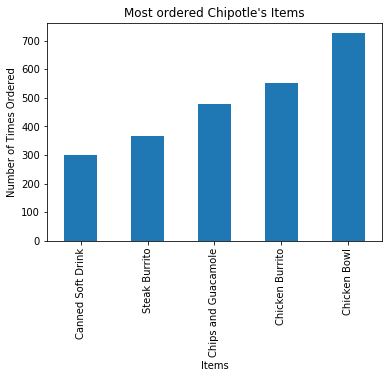

In [4]:
# get the Series of the names
x = chipo.item_name

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')

# sort the values from the top to the least value and slice the first 5 items
df = df[0].sort_values(ascending = True)[45:50]

# create the plot
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

# show the plot
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

(0, 36.7178857951459)

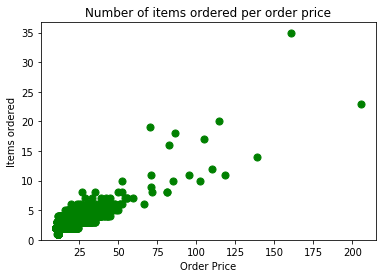

In [5]:
# create a list of prices
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price] # strip the dollar sign and trailing space

# then groupby the orders and sum
orders = chipo.groupby('order_id').sum()

# creates the scatterplot
# plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'green')
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

### BONUS: Create a question and a graph to answer your own question.

# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [2]:
path = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

online_rt = pd.read_csv(path, encoding = 'latin1')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

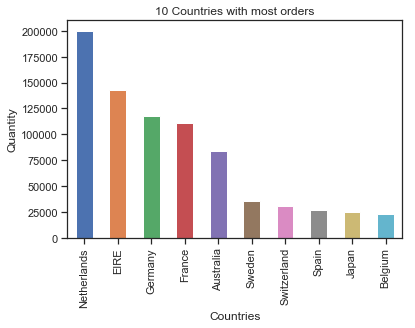

In [3]:
# group by the Country
countries = online_rt.groupby('Country').sum()

# sort the value and get the first 10 after UK
countries = countries.sort_values(by = 'Quantity',ascending = False)[1:11]

# create the plot
countries['Quantity'].plot(kind='bar')

# Set the title and labels
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')

# show the plot
plt.show()

### Step 5.  Exclude negative Quantity entries

In [4]:
online_rt = online_rt[online_rt.Quantity > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

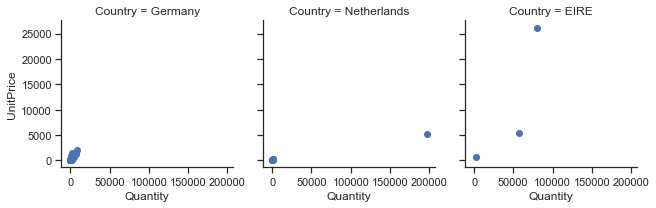

In [5]:
# groupby CustomerID
customers = online_rt.groupby(['CustomerID','Country']).sum()

# there is an outlier with negative price
customers = customers[customers.UnitPrice > 0]

# get the value of the index and put in the column Country
customers['Country'] = customers.index.get_level_values(1)

# top three countries
top_countries =  ['Netherlands', 'EIRE', 'Germany']

# filter the dataframe to just select ones in the top_countries
customers = customers[customers['Country'].isin(top_countries)]

#################
# Graph Section #
#################

# creates the FaceGrid
g = sns.FacetGrid(customers, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

# adds legend
g.add_legend()

### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [6]:
#This takes our initial dataframe groups it primarily by 'CustomerID' and secondarily by 'Country'.
#It sums all the (non-indexical) columns that have numerical values under each group.
customers = online_rt.groupby(['CustomerID','Country']).sum().head()

#Here's what it looks like:
customers

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [7]:
customers.UnitPrice.dtype
#So it's 'float64'
#But why did we sum 'UnitPrice', to begin with?
#If 'UnitPrice' wasn't something that we were interested in then it would be OK
#since we wouldn't care whether UnitPrice was being summed or not.
#But we want our graphs to reflect 'UnitPrice'!
#Note that summing up 'UnitPrice' can be highly misleading.
#It doesn't tell us much as to what the customer is doing.
#Suppose, a customer places one order of 1000 items that are worth $1 each.
#Another customer places a thousand orders of 1 item worth $1.
#There isn't much of a difference between what the former and the latter customers did.
#After all, they've spent the same amount of money.
#so we should be careful when we're summing columns. Sometimes we intend to sum just one column
#('Quantity' in this case) and another column like UnitPrice gets ito the mix.

dtype('float64')

##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [8]:
display(online_rt[online_rt.CustomerID == 12347.0].
        sort_values(by='UnitPrice', ascending = False).head())
display(online_rt[online_rt.CustomerID == 12346.0].
        sort_values(by='UnitPrice', ascending = False).head())
#The result is exactly what we'd suspected. Customer 12346.0 placed
#one giant order, whereas 12347.0 placed a lot of smaller orders.
#So we've identified one potential reason why our plots looked so weird at section 6.
#At this stage we need to go back to the initial problem we've specified at section 6.
#And make it more precise.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
428966,573511,22423,REGENCY CAKESTAND 3 TIER,6,10/31/11 12:25,12.75,12347.0,Iceland
286637,562032,22423,REGENCY CAKESTAND 3 TIER,3,8/2/11 8:48,12.75,12347.0,Iceland
72267,542237,22423,REGENCY CAKESTAND 3 TIER,3,1/26/11 14:30,12.75,12347.0,Iceland
148300,549222,22423,REGENCY CAKESTAND 3 TIER,3,4/7/11 10:43,12.75,12347.0,Iceland
428967,573511,23173,REGENCY TEAPOT ROSES,2,10/31/11 12:25,9.95,12347.0,Iceland


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [9]:
sales_volume = online_rt.groupby('Country').Quantity.sum().sort_values(ascending=False)

top3 = sales_volume.index[1:4] #We are excluding UK
top3

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [10]:
online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

In [11]:
grouped = online_rt[online_rt.Country.isin(top3)].groupby(['CustomerID','Country'])

plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# get the value of the index and put in the column Country
plottable['Country'] = plottable.index.get_level_values(1)
plottable.head()

,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


##### Step 7.3.3 Plot

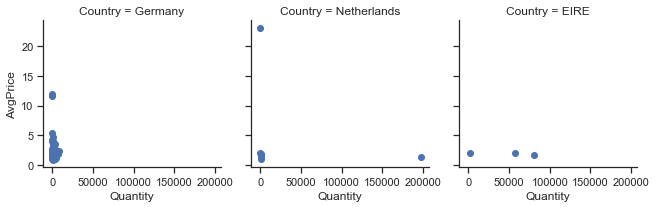

In [12]:
####################
# Graph Section v 2#
####################

# creates the FaceGrid
g = sns.FacetGrid(plottable, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "AvgPrice", alpha=1)

# adds legend
g.add_legend();

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

[]

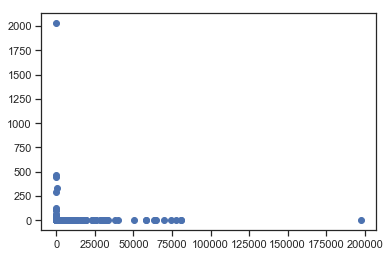

In [13]:
grouped = online_rt.groupby(['CustomerID'])
plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)
plt.plot()


#Turns out the graph is still extremely skewed towards the axes like an exponential decay function.

##### Step 7.4.2 Zoom in so we can see that curve more clearly

[]

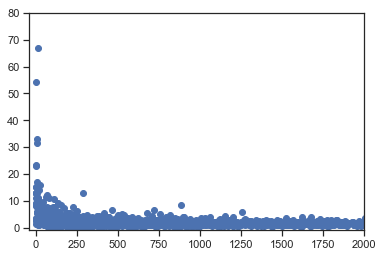

In [14]:
grouped = online_rt.groupby(['CustomerID','Country'])
plottable = grouped.agg({'Quantity': 'sum',
                         'Revenue': 'sum'})
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)

#Zooming in. (I'm starting the axes from a negative value so that
#the dots can be plotted in the graph completely.)
plt.xlim(-40,2000) 
plt.ylim(-1,80)

plt.plot()


#And there is still that pattern, this time in close-up!

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

In [15]:
#These are the values for the graph.
#They are used both in selecting data from
#the DataFrame and plotting the data so I've assigned
#them to variables to increase consistency and make things easier
#when playing with the variables.
price_start = 0 
price_end = 50
price_interval = 1

#Creating the buckets to collect the data accordingly
buckets = np.arange(price_start,price_end,price_interval)

#Select the data and sum
revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets)).Revenue.sum()
revenue_per_price.head()

UnitPrice
(0, 1]    1.107775e+06
(1, 2]    2.691765e+06
(2, 3]    2.024143e+06
(3, 4]    8.651018e+05
(4, 5]    1.219377e+06
Name: Revenue, dtype: float64

#### 8.3 Plot.

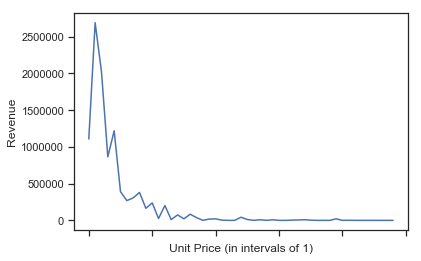

In [16]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of '+str(price_interval)+')')
plt.ylabel('Revenue')
plt.show()

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

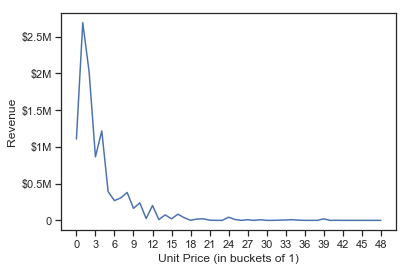

In [17]:
revenue_per_price.plot()

#Place labels
plt.xlabel('Unit Price (in buckets of '+str(price_interval)+')') 
plt.ylabel('Revenue')

#Even though the data is bucketed in intervals of 1,
#I'll plot ticks a little bit further apart from each other to avoid cluttering.
plt.xticks(np.arange(price_start,price_end,3),
           np.arange(price_start,price_end,3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()

#Looks like a major chunk of our revenue comes from items worth $0-$3!

### BONUS: Create your own question and answer it.

# Scores

### Introduction:

This time you will create the data.

***Exercise based on [Chris Albon](http://chrisalbon.com/) work, the credits belong to him.***

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Step 2. Create the DataFrame it should look like below.

In [2]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
            'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
            'female': [0, 1, 1, 0, 1],
            'age': [42, 52, 36, 24, 73], 
            'preTestScore': [4, 24, 31, 2, 3],
            'postTestScore': [25, 94, 57, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'female', 'preTestScore', 'postTestScore'])

df

,first_name,last_name,age,female,preTestScore,postTestScore
0,Jason,Miller,42,0,4,25
1,Molly,Jacobson,52,1,24,94
2,Tina,Ali,36,1,31,57
3,Jake,Milner,24,0,2,62
4,Amy,Cooze,73,1,3,70


### Step 3. Create a Scatterplot of preTestScore and postTestScore, with the size of each point determined by age
#### Hint: Don't forget to place the labels

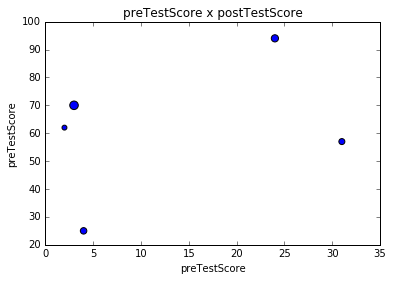

In [5]:
plt.scatter(df.preTestScore, df.postTestScore, s=df.age)

#set labels and titles
plt.title("preTestScore x postTestScore")
plt.xlabel('preTestScore')
plt.ylabel('preTestScore')

### Step 4. Create a Scatterplot of preTestScore and postTestScore.
### This time the size should be 4.5 times the postTestScore and the color determined by sex

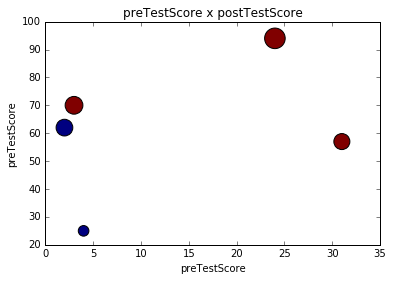

In [10]:
plt.scatter(df.preTestScore, df.postTestScore, s= df.postTestScore * 4.5, c = df.female)

#set labels and titles
plt.title("preTestScore x postTestScore")
plt.xlabel('preTestScore')
plt.ylabel('preTestScore')

### BONUS: Create your own question and answer it.

# Tips

Check out [Tips Visualization Exercises Video Tutorial](https://youtu.be/oiuKFigW4YM) to watch a data scientist go through the exercises

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [18]:
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# print the graphs in the notebook
% matplotlib inline

# set seaborn style to white
sns.set_style("white")

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [10]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv'
tips = pd.read_csv(url)

tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 4. Delete the Unnamed 0 column

In [12]:
del tips['Unnamed: 0']

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 5. Plot the total_bill column histogram

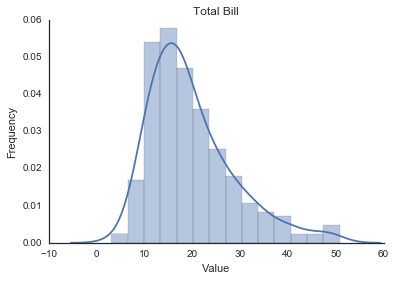

In [37]:
# create histogram
ttbill = sns.distplot(tips.total_bill);

# set lables and titles
ttbill.set(xlabel = 'Value', ylabel = 'Frequency', title = "Total Bill")

# take out the right and upper borders
sns.despine()

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

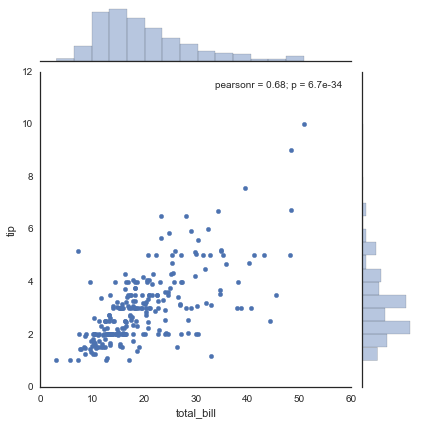

In [46]:
sns.jointplot(x ="total_bill", y ="tip", data = tips)

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

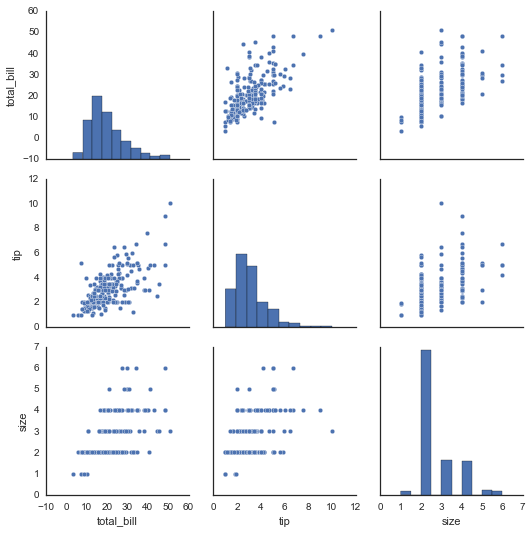

In [44]:
sns.pairplot(tips)

### Step 8. Present the relationship between days and total_bill value

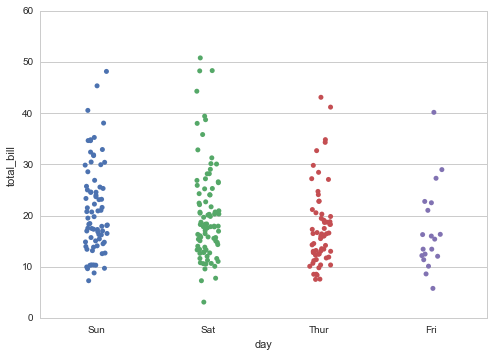

In [51]:
sns.stripplot(x = "day", y = "total_bill", data = tips, jitter = True);

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

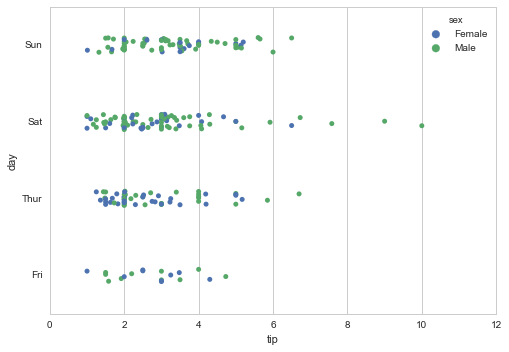

In [61]:
sns.stripplot(x = "tip", y = "day", hue = "sex", data = tips, jitter = True);

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

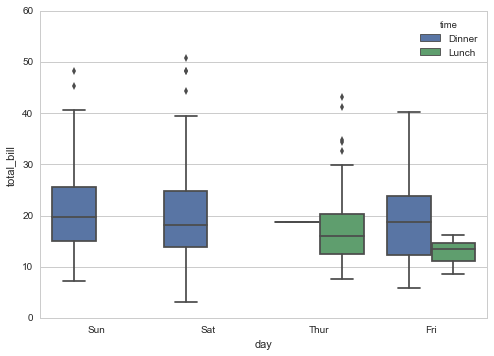

In [58]:
sns.boxplot(x = "day", y = "total_bill", hue = "time", data = tips);

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

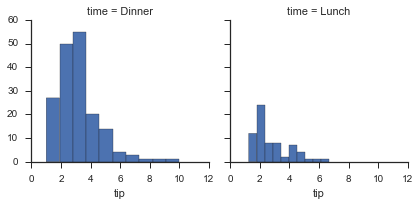

In [63]:
# better seaborn style
sns.set(style = "ticks")

# creates FacetGrid
g = sns.FacetGrid(tips, col = "time")
g.map(plt.hist, "tip");

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

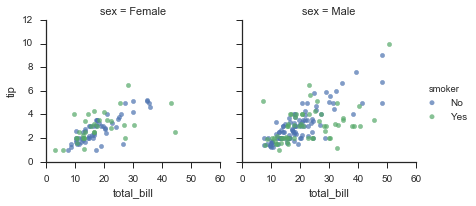

In [65]:
g = sns.FacetGrid(tips, col = "sex", hue = "smoker")
g.map(plt.scatter, "total_bill", "tip", alpha =.7)

g.add_legend();

### BONUS: Create your own question and answer it using a graph.

# Visualizing the Titanic Disaster

Check out [Titanic Visualization Exercises Video Tutorial](https://youtu.be/CBT0buoF_Ns) to watch a data scientist go through the exercises

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv) 

### Step 3. Assign it to a variable titanic 

In [4]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Titanic_Desaster/train.csv'

titanic = pd.read_csv(url)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 4. Set PassengerId as the index 

In [5]:
titanic.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 5. Create a pie chart presenting the male/female proportion

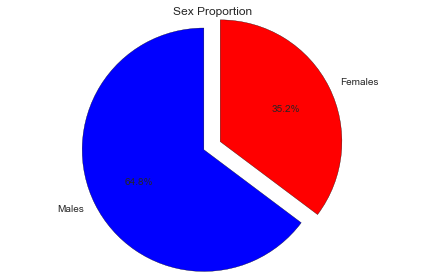

In [24]:
# sum the instances of males and females
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

# put them into a list called proportions
proportions = [males, females]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['Males', 'Females'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Sex Proportion")

# View the plot
plt.tight_layout()
plt.show()

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

(-5, 85)

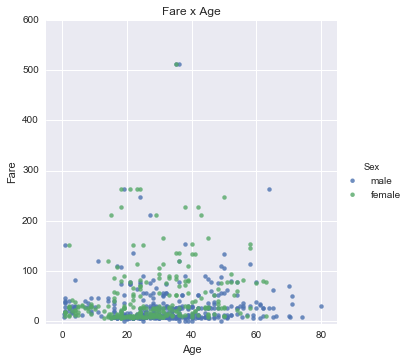

In [67]:
# creates the plot using
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)

# set title
lm.set(title = 'Fare x Age')

# get the axes object and tweak it
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

### Step 7. How many people survived?

In [68]:
titanic.Survived.sum()

342

### Step 8. Create a histogram with the Fare payed

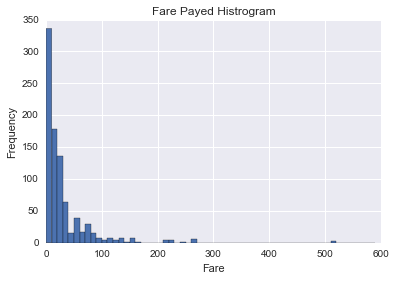

In [48]:
# sort the values from the top to the least value and slice the first 5 items
df = titanic.Fare.sort_values(ascending = False)
df

# create bins interval using numpy
binsVal = np.arange(0,600,10)
binsVal

# create the plot
plt.hist(df, bins = binsVal)

# Set the title and labels
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')

# show the plot
plt.show()

### BONUS: Create your own question and answer it.

# Pokemon

### Introduction:

This time you will create the data.



### Step 1. Import the necessary libraries

In [2]:
import pandas as pd

### Step 2. Create a data dictionary

In [3]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

### Step 3. Assign it to a variable called pokemon

In [5]:
pokemon = pd.DataFrame(raw_data)
pokemon.head()

,evolution,hp,name,pokedex,type
0,Ivysaur,45,Bulbasaur,yes,grass
1,Charmeleon,39,Charmander,no,fire
2,Wartortle,44,Squirtle,yes,water
3,Metapod,45,Caterpie,no,bug


### Step 4. Ops...it seems the DataFrame columns are in alphabetical order. Place  the order of the columns as name, type, hp, evolution, pokedex

In [8]:
pokemon = pokemon[['name', 'type', 'hp', 'evolution','pokedex']]
pokemon

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


### Step 5. Add another column called place, and insert what you have in mind.

In [13]:
pokemon['place'] = ['park','street','lake','forest']
pokemon

,name,type,hp,evolution,pokedex,place
0,Bulbasaur,grass,45,Ivysaur,yes,park
1,Charmander,fire,39,Charmeleon,no,street
2,Squirtle,water,44,Wartortle,yes,lake
3,Caterpie,bug,45,Metapod,no,forest


### Step 6. Present the type of each column

In [9]:
pokemon.dtypes

name         object
type         object
hp            int64
evolution    object
pokedex      object
dtype: object

### BONUS: Create your own question and answer it.

# Apple Stock

Check out [Apple Stock Exercises Video Tutorial](https://youtu.be/wpXkR_IZcug) to watch a data scientist go through the exercises

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [4]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [32]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
apple = pd.read_csv(url)

apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [33]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [34]:
apple.Date = pd.to_datetime(apple.Date)

apple['Date'].head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

### Step 6.  Set the date as the index

In [35]:
apple = apple.set_index('Date')

apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [36]:
# NO! All are unique
apple.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [39]:
apple.sort_index(ascending = True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [48]:
apple_month = apple.resample('BM').mean()

apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,25862523,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7249866,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4231831,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7962690,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6392000,0.423333


### Step 10.  What is the difference in days between the first day and the oldest

In [65]:
(apple.index.max() - apple.index.min()).days

12261

### Step 11.  How many months in the data we have?

In [66]:
apple_months = apple.resample('BM').mean()

len(apple_months.index)

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

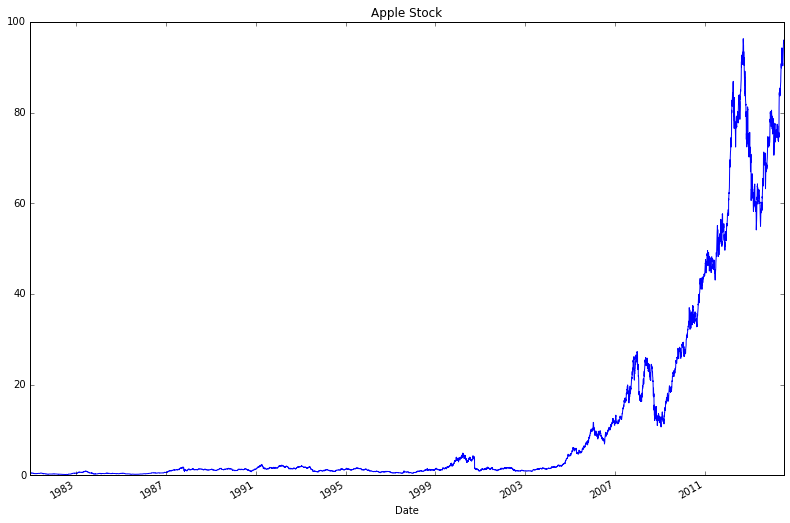

In [81]:
# makes the plot and assign it to a variable
appl_open = apple['Adj Close'].plot(title = "Apple Stock")

# changes the size of the graph
fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)

### BONUS: Create your own question and answer it.

# Investor - Flow of Funds - US

Check out [Investor Flow of Funds Exercises Video Tutorial](https://youtu.be/QG6WbOgC9QE) to watch a data scientist go through the exercises

### Introduction:

Special thanks to: https://github.com/rgrp for sharing the dataset.

### Step 1. Import the necessary libraries

In [30]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv). 

### Step 3. Assign it to a variable called 

In [31]:
url = 'https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv'
df = pd.read_csv(url)
df.head()

,Date,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
0,2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
1,2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2,2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
3,2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
4,2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


### Step 4.  What is the frequency of the dataset?

In [32]:
# weekly data

### Step 5. Set the column Date as the index.

In [33]:
df = df.set_index('Date')
df.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


### Step 6. What is the type of the index?

In [34]:
df.index
# it is a 'object' type

Index([u'2012-12-05', u'2012-12-12', u'2012-12-19', u'2012-12-26',
       u'2013-01-02', u'2013-01-09', u'2014-04-02', u'2014-04-09',
       u'2014-04-16', u'2014-04-23', u'2014-04-30', u'2014-05-07',
       u'2014-05-14', u'2014-05-21', u'2014-05-28', u'2014-06-04',
       u'2014-06-11', u'2014-06-18', u'2014-06-25', u'2014-07-02',
       u'2014-07-09', u'2014-07-30', u'2014-08-06', u'2014-08-13',
       u'2014-08-20', u'2014-08-27', u'2014-09-03', u'2014-09-10',
       u'2014-11-05', u'2014-11-12', u'2014-11-19', u'2014-11-25',
       u'2015-01-07', u'2015-01-14', u'2015-01-21', u'2015-01-28',
       u'2015-02-04', u'2015-02-11', u'2015-03-04', u'2015-03-11',
       u'2015-03-18', u'2015-03-25', u'2015-04-01', u'2015-04-08'],
      dtype='object', name=u'Date')

### Step 7. Set the index to a DatetimeIndex type

In [35]:
df.index = pd.to_datetime(df.index)
type(df.index)

pandas.tseries.index.DatetimeIndex

### Step 8.  Change the frequency to monthly, sum the values and assign it to monthly.

In [36]:
monthly = df.resample('M').sum()
monthly

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156.0,-23126.0,-3031.0,526.0,9848.0,12613.0,-2765.0,-15782.0
2013-01-31,3661.0,-1627.0,5288.0,2730.0,12149.0,9414.0,2735.0,18540.0
2013-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 9. You will notice that it filled the dataFrame with months that don't have any data with NaN. Let's drop these rows.

In [37]:
monthly = monthly.dropna()
monthly

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156.0,-23126.0,-3031.0,526.0,9848.0,12613.0,-2765.0,-15782.0
2013-01-31,3661.0,-1627.0,5288.0,2730.0,12149.0,9414.0,2735.0,18540.0
2014-04-30,10842.0,1048.0,9794.0,4931.0,8493.0,7193.0,1300.0,24267.0
2014-05-31,-2203.0,-8720.0,6518.0,3172.0,13767.0,10192.0,3576.0,14736.0
2014-06-30,2319.0,-6546.0,8865.0,4588.0,9715.0,7551.0,2163.0,16621.0
2014-07-31,-7051.0,-11128.0,4078.0,2666.0,7506.0,7026.0,481.0,3122.0
2014-08-31,1943.0,-5508.0,7452.0,1885.0,1897.0,-1013.0,2910.0,5723.0
2014-09-30,-2767.0,-6596.0,3829.0,1599.0,3984.0,2479.0,1504.0,2816.0
2014-11-30,-2753.0,-7239.0,4485.0,729.0,14528.0,11566.0,2962.0,12502.0


### Step 10. Good, now we have the monthly data. Now change the frequency to year.

In [38]:
year = monthly.resample('AS-JAN').sum()
year

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-01-01,-26156.0,-23126.0,-3031.0,526.0,9848.0,12613.0,-2765.0,-15782.0
2013-01-01,3661.0,-1627.0,5288.0,2730.0,12149.0,9414.0,2735.0,18540.0
2014-01-01,330.0,-44689.0,45021.0,19570.0,59890.0,44994.0,14896.0,79787.0
2015-01-01,15049.0,-10459.0,25508.0,7280.0,26028.0,17986.0,8041.0,48357.0


### BONUS: Create your own question and answer it.

# Iris

Check out [Iris Exercises Video Tutorial](https://youtu.be/yAtzFLCWSZo) to watch a data scientist go through the exercises

### Introduction:

This exercise may seem a little bit strange, but keep doing it.

### Step 1. Import the necessary libraries

In [13]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data). 

### Step 3. Assign it to a variable called iris

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(url)

iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### Step 4. Create columns for the dataset

In [5]:
# 1. sepal_length (in cm)
# 2. sepal_width (in cm)
# 3. petal_length (in cm)
# 4. petal_width (in cm)
# 5. class

iris.columns = ['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### Step 5.  Is there any missing value in the dataframe?

In [11]:
pd.isnull(iris).sum()
# nice no missing value

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

### Step 6.  Lets set the values of the rows 10 to 29 of the column 'petal_length' to NaN

In [36]:
iris.iloc[10:30,2:3] = np.nan
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


### Step 7. Good, now lets substitute the NaN values to 1.0

In [39]:
iris.petal_length.fillna(1, inplace = True)
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


### Step 8. Now let's delete the column class

In [40]:
del iris['class']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


### Step 9.  Set the first 3 rows as NaN

In [52]:
iris.iloc[0:3 ,:] = np.nan
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,5.0,3.4,1.5,0.2
4,4.4,2.9,1.4,0.2


### Step 10.  Delete the rows that have NaN

In [53]:
iris = iris.dropna(how='any')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
3,5.0,3.4,1.5,0.2
4,4.4,2.9,1.4,0.2
5,4.9,3.1,1.5,0.1
6,5.4,3.7,1.5,0.2
7,4.8,3.4,1.0,0.2


### Step 11. Reset the index so it begins with 0 again

In [56]:
iris = iris.reset_index(drop = True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.4,1.5,0.2
1,4.4,2.9,1.4,0.2
2,4.9,3.1,1.5,0.1
3,5.4,3.7,1.5,0.2
4,4.8,3.4,1.0,0.2


### BONUS: Create your own question and answer it.

# Wine

### Introduction:

This exercise is a adaptation from the UCI Wine dataset.
The only pupose is to practice deleting data with pandas.

### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data). 

### Step 3. Assign it to a variable called wine

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine = pd.read_csv(url)

wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### Step 4. Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

In [4]:
wine = wine.drop(wine.columns[[0,3,6,8,11,12,13]], axis = 1)

wine.head()

,14.23,1.71,15.6,127,3.06,2.29,5.64
0,13.20,1.78,11.2,100,2.76,1.28,4.38
1,13.16,2.36,18.6,101,3.24,2.81,5.68
2,14.37,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


### Step 5. Assign the columns as below:

The attributes are (donated by Riccardo Leardi, riclea '@' anchem.unige.it):  
1) alcohol  
2) malic_acid  
3) alcalinity_of_ash  
4) magnesium  
5) flavanoids  
6) proanthocyanins  
7) hue 

In [5]:
wine.columns = ['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium', 'flavanoids', 'proanthocyanins', 'hue']
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,13.20,1.78,11.2,100,2.76,1.28,4.38
1,13.16,2.36,18.6,101,3.24,2.81,5.68
2,14.37,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


### Step 6. Set the values of the first 3 rows from alcohol as NaN

In [6]:
wine.iloc[0:3, 0] = np.nan
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100,2.76,1.28,4.38
1,NaN,2.36,18.6,101,3.24,2.81,5.68
2,NaN,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


### Step 7. Now set the value of the rows 3 and 4 of magnesium as NaN

In [7]:
wine.iloc[2:4, 3] = np.nan
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100.0,2.76,1.28,4.38
1,NaN,2.36,18.6,101.0,3.24,2.81,5.68
2,NaN,1.95,16.8,NaN,3.49,2.18,7.80
3,13.24,2.59,21.0,NaN,2.69,1.82,4.32
4,14.20,1.76,15.2,112.0,3.39,1.97,6.75


### Step 8. Fill the value of NaN with the number 10 in alcohol and 100 in magnesium

In [8]:
wine.alcohol.fillna(10, inplace = True)

wine.magnesium.fillna(100, inplace = True)

wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.78,11.2,100.0,2.76,1.28,4.38
1,10.00,2.36,18.6,101.0,3.24,2.81,5.68
2,10.00,1.95,16.8,100.0,3.49,2.18,7.80
3,13.24,2.59,21.0,100.0,2.69,1.82,4.32
4,14.20,1.76,15.2,112.0,3.39,1.97,6.75


### Step 9. Count the number of missing values

In [9]:
wine.isnull().sum()

alcohol              0
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

### Step 10.  Create an array of 10 random numbers up until 10

In [10]:
random = np.random.randint(10, size = 10)
random

array([2, 3, 0, 5, 0, 9, 4, 0, 7, 2])

### Step 11.  Use random numbers you generated as an index and assign NaN value to each of cell.

In [11]:
wine.alcohol[random] = np.nan
wine.head(10)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100.0,2.76,1.28,4.38
1,10.00,2.36,18.6,101.0,3.24,2.81,5.68
2,NaN,1.95,16.8,100.0,3.49,2.18,7.80
3,NaN,2.59,21.0,100.0,2.69,1.82,4.32
4,NaN,1.76,15.2,112.0,3.39,1.97,6.75
5,NaN,1.87,14.6,96.0,2.52,1.98,5.25
6,14.06,2.15,17.6,121.0,2.51,1.25,5.05
7,NaN,1.64,14.0,97.0,2.98,1.98,5.20
8,13.86,1.35,16.0,98.0,3.15,1.85,7.22
9,NaN,2.16,18.0,105.0,3.32,2.38,5.75


### Step 12.  How many missing values do we have?

In [12]:
wine.isnull().sum()

alcohol              7
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

### Step 13. Delete the rows that contain missing values

In [13]:
wine = wine.dropna(axis = 0, how = "any")
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
1,10.00,2.36,18.6,101.0,3.24,2.81,5.68
6,14.06,2.15,17.6,121.0,2.51,1.25,5.05
8,13.86,1.35,16.0,98.0,3.15,1.85,7.22
10,14.12,1.48,16.8,95.0,2.43,1.57,5.00
11,13.75,1.73,16.0,89.0,2.76,1.81,5.60


### Step 14. Print only the non-null values in alcohol

In [14]:
mask = wine.alcohol.notnull()
mask

1      True
6      True
8      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
       ... 
147    True
148    True
149    True
150    True
151    True
152    True
153    True
154    True
155    True
156    True
157    True
158    True
159    True
160    True
161    True
162    True
163    True
164    True
165    True
166    True
167    True
168    True
169    True
170    True
171    True
172    True
173    True
174    True
175    True
176    True
Name: alcohol, dtype: bool

In [15]:
wine.alcohol[mask]

1      10.00
6      14.06
8      13.86
10     14.12
11     13.75
12     14.75
13     14.38
14     13.63
15     14.30
16     13.83
17     14.19
18     13.64
19     14.06
20     12.93
21     13.71
22     12.85
23     13.50
24     13.05
25     13.39
26     13.30
27     13.87
28     14.02
29     13.73
30     13.58
31     13.68
32     13.76
33     13.51
34     13.48
35     13.28
36     13.05
       ...  
147    13.32
148    13.08
149    13.50
150    12.79
151    13.11
152    13.23
153    12.58
154    13.17
155    13.84
156    12.45
157    14.34
158    13.48
159    12.36
160    13.69
161    12.85
162    12.96
163    13.78
164    13.73
165    13.45
166    12.82
167    13.58
168    13.40
169    12.20
170    12.77
171    14.16
172    13.71
173    13.40
174    13.27
175    13.17
176    14.13
Name: alcohol, dtype: float64

### Step 15.  Reset the index, so it starts with 0 again

In [16]:
wine = wine.reset_index(drop = True)
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,2.36,18.6,101.0,3.24,2.81,5.68
1,14.06,2.15,17.6,121.0,2.51,1.25,5.05
2,13.86,1.35,16.0,98.0,3.15,1.85,7.22
3,14.12,1.48,16.8,95.0,2.43,1.57,5.00
4,13.75,1.73,16.0,89.0,2.76,1.81,5.60


### BONUS: Create your own question and answer it.